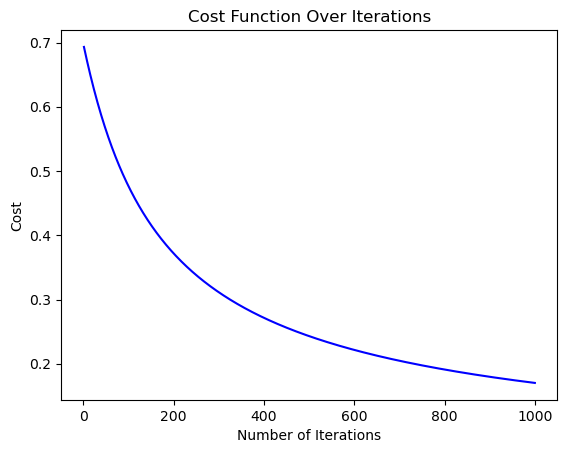

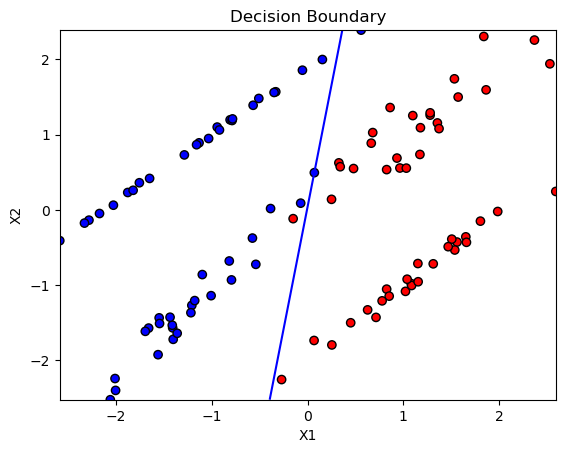

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression(X, y, learning_rate, num_iterations):
    
    m, n = X.shape
    theta = np.zeros((n, 1))
    y = y.reshape(m, 1)

    cost_history = []

    for i in range(num_iterations):
        
        predictions = sigmoid(np.dot(X, theta))

       
        error = predictions - y

       
        gradients = np.dot(X.T, error) / m

        
        theta -= learning_rate * gradients

        
        cost = -1/m * (np.dot(y.T, np.log(predictions)) + np.dot((1 - y).T, np.log(1 - predictions)))
        cost_history.append(cost.item())

    return theta, cost_history


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

learning_rate = 0.01
num_iterations = 1000


X = np.c_[np.ones((X.shape[0], 1)), X]


theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)


plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()


plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()
